# Recommenders 4 : Pytorch and Recommenders (~1h)

In this practical session, we dive a little more into [pytorch](https://pytorch.org/docs/stable/index.html) and propose to re-implement two classical matrix-factorization models with this neural network toolkit.

## Objectives:

- (a) See a bit of simple pytorch (~5min)
- (b) Discover the "autograd" part of pytorch to build a simple baseline (~20min)
- (c) Discover the "nn" part of pytorch to build a simple matrix factorization algorithm (~20min)
- (d) Learn to use a high level framework for pytorch (kind of "KERAS" like) to build more complicated algorithms (~15min)




In [1]:
# ! pip install torch torchvision pytorch-lightning --upgrade
# ! pip install matplotlib --upgrade

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (a) WHAT IS PYTORCH?

It’s a Python-based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

### Tensors : the main unit

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.


## Some useful functions:

### Creating tensors

#### initialize an empty 4x2 matrix

In [3]:
x_empty = torch.empty(4, 2)
print(x_empty)  #Tensor is not initialized => contains gibberish

tensor([[0.0000e+00, 9.6429e-39],
        [2.0826e+23, 5.3639e-08],
        [2.0338e+20, 2.6226e-09],
        [1.3016e+22, 1.7585e-04]])


#### create a 3x2 tensor filled with zeros of type long

In [4]:
x0 = torch.zeros(3, 2, dtype=torch.long)
print(x0) #Tensor has only zeros

tensor([[0, 0],
        [0, 0],
        [0, 0]])


#### create a tensor of size 2 with (0 => 5.5) and (1 => 3)

In [5]:
x_data = torch.tensor([5.5, 3])
print(x_data) 

tensor([5.5000, 3.0000])


In [6]:
x_data = torch.tensor(np.array([5.5, 3])) #also works with numpy arrays
print(x_data) 

tensor([5.5000, 3.0000], dtype=torch.float64)


#### create random 5x3 and 3x5 tensors 

In [7]:
x = torch.rand(5,3)
y = torch.rand(3,5)
print(x)
print(y)

tensor([[0.9378, 0.1067, 0.3300],
        [0.7888, 0.3527, 0.9545],
        [0.2996, 0.8375, 0.3158],
        [0.6897, 0.2835, 0.5356],
        [0.6216, 0.5687, 0.6924]])
tensor([[0.3629, 0.9372, 0.5462, 0.5289, 0.4704],
        [0.7396, 0.3079, 0.6561, 0.1430, 0.2354],
        [0.3311, 0.1487, 0.6326, 0.1668, 0.4655]])


#### Indexing works just like numpy 

In [8]:
x[:,1] #The 2nd column (indexing starts at 0)

tensor([0.1067, 0.3527, 0.8375, 0.2835, 0.5687])

In [9]:
x[[1,3],:] # the 2nd and 4th row 
# or x[[1,3]]

tensor([[0.7888, 0.3527, 0.9545],
        [0.6897, 0.2835, 0.5356]])

In [10]:
scalar = torch.tensor([1])
print(scalar.item()) # Gets the value when tensor is a scalar

1


#### know the size of a tensor

In [11]:
x.size() ## equivalent to x.shape in numpy

torch.Size([5, 3])

#### simple addition

In [12]:
x+1        # same as x.add(1)
x.add_(1)  # inplace

tensor([[1.9378, 1.1067, 1.3300],
        [1.7888, 1.3527, 1.9545],
        [1.2996, 1.8375, 1.3158],
        [1.6897, 1.2835, 1.5356],
        [1.6216, 1.5687, 1.6924]])

#### matrix multiplication

In [13]:
torch.mm(x,y) # same as x @ y or np.dot(x.numpy(),y.numpy())

tensor([[1.9620, 2.3546, 2.6258, 1.4049, 1.7912],
        [2.2967, 2.3836, 3.1009, 1.4654, 2.0698],
        [2.2663, 1.9794, 2.7478, 1.1695, 1.6564],
        [2.0709, 2.2071, 2.7364, 1.3333, 1.8119],
        [2.3090, 2.2544, 2.9855, 1.3642, 1.9200]])

### What to understand:

Pytorch can be a drop-in replacement for numpy. It behaves mostly the same and the API is close.


### There are many more creation/operation ops:

=> You can have a look at the [torch.Tensor documentation](https://pytorch.org/docs/stable/tensors.html)

## What's interesting beyond the "numpy replacement": autodiff !

Pytorch has Automatic differentiation: You only have to compute a loss function to obtain gradients automatically. How it works is detailed [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-tensors-and-autograd)

### Let's do 1d-linear regression with the vanilla autodiff !

#### (First) we need fake data:

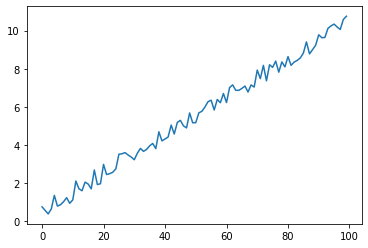

In [14]:
fake_x = np.arange(0,100,1)
fake_y = np.arange(0,10,0.1) + np.random.rand(100)
plt.plot(fake_x,fake_y)

**NOTE:** Here, we won't split the data in train/val/test, this is just an example

So, the linear model we want to learn is the following:
$$f(x) =  wx+b $$
The parameters to optimize are w and b.

In [15]:
# First we create to tensor variables (which are our parameters)
w = torch.tensor([1.],requires_grad=True) # We need to set requires_grad to True so the gradient can flow.
b = torch.tensor([0.5],requires_grad=True)

In [16]:
# We define the f function:
def f(x):
    return (w*x)+b

In [17]:
# We define an error function (here the MAE)
def error(pred,real):
    return (pred-real).abs()

----
loss: 32.47551399290562
w: 0.5049999952316284
b: 0.49020129442214966
----
loss: 8.387166615724563
w: 0.10500003397464752
b: 0.4814024567604065
----
loss: 0.31570376694202423
w: 0.10500003397464752
b: 0.48060256242752075
----
loss: 0.3156397706270218
w: 0.10500003397464752
b: 0.479802668094635


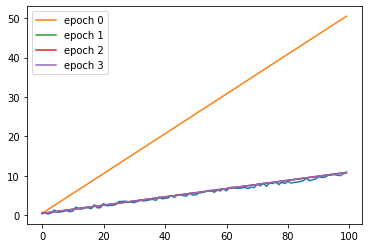

In [18]:
# Finally, we cycle through the data, optimizing the parameters with respect to the gradient of the error:
plt.plot(fake_y)

for epoch in range(4): # We cycle 4 times
    mean_loss = 0
    
    for x,y in zip(fake_x,fake_y): 
        
        pred = f(x) #predict
        loss = error(pred,y) #compute loss
        loss.backward() # This does backpropagation and sets .grad attribute.

        # Update parameters via SGD:
        with torch.no_grad(): # This deactivated gradient calculations
            
            mean_loss += loss.item() # get the raw value of a (1,) tensor
            w -= 0.0001 * w.grad # This wouldn't be possible w/ gradient (-= is an inplace operation)
            b -= 0.0001 * b.grad
            w.grad.zero_()
            b.grad.zero_()
            
    # Plot the resulting line        
    predictions = [f(x).detach().numpy() for x in range(100)]
    plt.plot(predictions,label=f"epoch {epoch}")

    print('----')
    print("loss:", mean_loss/len(fake_y))
    print('w:',w.item())
    print('b:',b.item())
    
plt.legend()


# Full pytorch tutorial: 

A tutorial can be found [here](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) do not hesitate to take a couple of minutes to skim read it. Plenty of [ressources](https://pytorch.org/resources) are available online. Also, you can have a look at the [extensive pytorch documentation](https://pytorch.org/docs/stable/index.html). 

Here, as we are defining neural networks, we mainly use the `torch.nn` module which contains most classical deep learning building blocks



## Data used : [smallest movie-lens dataset](https://grouplens.org/datasets/movielens/)

=> Just like the previous sessions


# 1)  Load & Prepare Data

To be able to embed the data easily, we need to remap  the user/items between [0->N_User] and [0->N_Items].

In [19]:
from random import shuffle

## Load
ratings = pd.read_csv("dataset/ratings.csv")
ratings.head(5)

## Prepare Data
user_map = {user:num for num,user in enumerate(ratings["userId"].unique())}
item_map = {item:num for num,item in enumerate(ratings["movieId"].unique())}

## Number of users & items
num_users = len(user_map)
num_items = len(item_map)

ratings["userId"] = ratings["userId"].map(user_map)
ratings["movieId"] = ratings["movieId"].map(item_map)

ratings.head(5)

# Creating Test/Train as before

train_indexes,val_indexes,test_indexes = [],[],[]

for index in range(len(ratings)):
    if index%5 == 0:
        test_indexes.append(index)
    else:
        train_indexes.append(index)

        
shuffle(train_indexes)
num_val = int(len(train_indexes)/100*20)
val_indexes = train_indexes[:num_val]
train_indexes = train_indexes[num_val:]

train_ratings = ratings.iloc[train_indexes].copy()
val_ratings = ratings.iloc[val_indexes].copy()
test_ratings = ratings.iloc[test_indexes].copy()


print(f" #train:{len(train_ratings)}, #val:{len(val_ratings)} ,#test:{len(test_ratings)}" )



 #train:64535, #val:16133 ,#test:20168


## (TODO) Reproduce the baseline model with pytorch's vanilla autograd

Your goal now is to reproduce the following baseline model from surprise

## $$\hat{r}_{ui} = b_{ui} = \mu + b_u + b_i$$

## (TODO) : First, let's define the parameters

You have many parameters, they are all 1-dimensional:
- **mu:** the global mean (1,)
- **bu:** the user means (n_users,)
- **bi:** the item means (n_items,)


In [20]:
mu = torch.tensor([ratings["rating"].mean()], requires_grad=True)
bu = [torch.tensor([x], requires_grad=True) for x in ratings.groupby("userId")["rating"].mean()]
bi = [torch.tensor([x], requires_grad=True) for x in ratings.groupby("movieId")["rating"].mean()]


Then, we define two functions: 

- `predict(u,i)` : Will return the prediction given the (user,item) pair
- `error(pred,real)` : Will return the MSE error of prediction

#### (TODO) Predict Function
This function should implement this: $\hat{r}_{ui} = b_{ui} = \mu + b_u + b_i$

In [21]:
def predict(u,i):
    # User mean
    if u < num_users: # if user exist:
        user_mean = bu[u]
    else:
        user_mean = 0

    # Item mean 
    if i < num_items: # if item exist:
        item_mean = bi[i]
    else:
        item_mean = 0
        
    # Like in the formula shown above, we return : mu + bu + bi
    return mu + user_mean + item_mean

### (TODO) error function
We want to use the MSE

In [22]:
def error(pred,real):
    # We return the squared difference between the truth and the prediction values
    return (real - pred)**2

#### The evaluation loop, without any optimization for now

In [23]:
train_e = 0
for index, uid, mid, r, ts in train_ratings.itertuples():
    result = predict(uid,mid)
    train_e += error(result,r).item()
    
val_e = 0
for index, uid, mid, r, ts in val_ratings.itertuples():
    result = predict(uid,mid)
    val_e += error(result,r).item()

test_e = 0
for index, uid, mid, r, ts in test_ratings.itertuples():
    result = predict(uid,mid)
    test_e += error(result,r).item()

print("final train error : ", train_e/len(train_ratings))
print("final val error : ", val_e/len(val_ratings))
print("final test error : ", test_e/len(test_ratings))

final train error :  49.7796137707048
final val error :  49.473817058557714
final test error :  49.72078917672815


## Let's optimize the parameters (with SGD)  by slightly modifying the previous loop

### (TODO)


In [24]:
lr = 0.01
batch_size = 32
n_epochs = 5

for epoch in range(n_epochs):
    
    train_error = 0
    
    for num,(index, uid, mid, r, ts) in enumerate(train_ratings.sample(frac=1).itertuples()):
        # uid = user id
        # mid = movie id
        # We use the functions we have coded before
        result = predict(uid, mid)
        ex_error = error(result, r)
        train_error += ex_error.item()
        
        ex_error.backward()

        if num % batch_size == 0:
            
            with torch.no_grad():
                mu -= lr * mu.grad
                bu[uid] -= lr * bu[uid].grad
                bi[mid] -= lr * bi[mid].grad

                # Manually zero the gradients after updating weights
                mu.grad.zero_()
                bu[uid].grad.zero_()
                bi[mid].grad.zero_()


    print(f"epoch {epoch} train error : ", train_e/len(train_ratings))
    
    val_e = 0
    for index, uid, mid, r, ts in val_ratings.itertuples():
        result = predict(uid,mid)
        val_e += error(result,r).item()

    print(f"epoch {epoch} val error : ", val_e/len(val_ratings))


    test_e = 0
    for index, uid, mid, r, ts in test_ratings.itertuples():
        result = predict(uid,mid)
        test_e += error(result,r).item()

    print(f"epoch {epoch} test error : ", test_e/len(test_ratings))
    print("-----")

epoch 0 train error :  49.7796137707048
epoch 0 val error :  0.6526928174994974
epoch 0 test error :  0.6411786294399203
-----
epoch 1 train error :  49.7796137707048
epoch 1 val error :  0.6546947233048782
epoch 1 test error :  0.652621880003589
-----
epoch 2 train error :  49.7796137707048
epoch 2 val error :  0.6926512043939949
epoch 2 test error :  0.6784380745035686
-----
epoch 3 train error :  49.7796137707048
epoch 3 val error :  0.6652412904852445
epoch 3 test error :  0.6637780392521719
-----
epoch 4 train error :  49.7796137707048
epoch 4 val error :  0.6745200298061934
epoch 4 test error :  0.6724228898239578
-----


#  Pytorch (.nn) Modules

Instead of having to define everything by hand, pytorch has several usefull abstractions:

- `nn.Module()` -> To define the model and the forward computation
- `torch.utils.data.DataLoader` -> To create the data pipeline

To explore these modules, we'll do the following model:

##  Classic SVD (with mean)

To see how it works, we propose to implement a simple SVD:
### $$ \min\limits_{U,I}\sum\limits_{(u,i)} \underbrace{(r_{ui} -  (I_i^TU_u + \mu))^2}_\text{minimization} + \underbrace{\lambda(||U_u||^2+||I_u||^2 + \mu) }_\text{regularization} $$

where prediction is done in the following way:
### $$r_{ui} = \mu + U_u.I_i $$

where $\mu$ is the global mean,  $U_u$ a user embedding and $I_i$ an item embedding

### STEPS:
 To implement such model in pytorch, we need to do multiple things:
 
 - (1) model definition
 - (2) loss function
 - (3) evaluation
 - (4) training/eval loop


#### (1) Model definition

A model class typically extends `nn.Module`, the Neural network module. It is a convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.

One should define two functions: `__init__` and `forward`.

- `__init__` is used to initialize the model parameters
- `forward` is the net transformation from input to output. In fact, when doing `moduleClass(input)` you call this method.

##### (a) Initialization

Our model has different weigths:

- the user profiles (also called user embeddings) $U$
- the item profiles (also called user embeddings) $I$
- the mean bias $\mu$


##### (b) input to output operation
Technically, the prediction as defined earlier can be seen as just a dot product between two embeddings $U_u$ and $I_i$ plus the mean rating:

- `torch.sum(embed_u*embed_i,1) + self.mean` is equivalent to $r_{ui} = \mu + U_u.I_i $ 
- the `.squeeze(1)` operation is a shape operation to remove the dimension 1 (indexing starts at 0) akin to reshaping the matrix from `(batch_size,1,latent_size)` to `(batch_size,latent_size)`
- for reference, the inverse operation is `.unsqueeze()`
- we return weights to regularize them


### (TODO) Just to make sure you were following: complete the following `forward` method

In [25]:
#  Let's create the datasets following  (Object w/ __getitem__(index) and __len()__, i.e lists ;)
prep_train = [(tp.userId,tp.movieId,tp.rating) for tp in train_ratings.itertuples()]
prep_val = [(tp.userId,tp.movieId,tp.rating) for tp in val_ratings.itertuples()]
prep_test = [(tp.userId,tp.movieId,tp.rating) for tp in test_ratings.itertuples()]

In [29]:
import torch
import torch.nn as nn


# The model define as a class, inheriting from nn.Module
class ClassicMF(nn.Module):
    
    #(a) Init
    def __init__(self,nb_users,nb_items,latent_size):
        super(ClassicMF, self).__init__()
        
        #Embedding layers
        self.users = nn.Embedding(nb_users, latent_size)        
        self.items = nn.Embedding(nb_items, latent_size)
        #The mean bias
        self.mean = nn.Parameter(torch.FloatTensor(1,).fill_(3))
        
        #initialize weights with very small values
        nn.init.normal_(self.users.weight,0,0.01)
        nn.init.normal_(self.items.weight,0,0.01)

    
    # (b) How we compute the prediction (from input to output)
    def forward(self, user, item): ## method called when doing ClassicMF(user,item)
        
        embed_u,embed_i = self.users(user).squeeze(1),self.items(item).squeeze(1)
        out =  torch.sum(embed_u * embed_i, 1) + self.mean

        return out, embed_u, embed_i, self.mean  # We return prediction + weights to regularize them

#### (2-4) full train loop

The train loop is organized around the [Dataloader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) class which Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.

We just redefine a collate function

> collate_fn (callable, optional) – merges a list of samples to form a mini-batch.


**NOTE:** The dataset argument can be a list instead of a "Dataset" instance (works by duck typing)
    

##### The train loop sequence is the following:
    
[Dataset ==Dataloader==> Batch (not prepared) ==collate_fn==> Batch (prepared) ==Model.forward==> Prediction =loss_fn=> loss <-> truth 

1] PREDICT
- (a) The dataloader samples training exemples from the dataset (which is a list)
- (b) The collate_fn prepares the minibatch of training exemples
- (c) The prediction is made by feeding the minibatch in the model
- (d) The loss is computed on the prediction via a loss function

2] OPTIMIZE
- (e) Gradients are computed by automatic backard propagation
- (f) Parameters are updated using computed gradients

In [30]:
from torch.utils.data import DataLoader
import torch.nn.functional as F


# HyperParameters
n_epochs = 3
batch_size = 16
num_feat = 25
lr = 0.01
reg = 0.001


#(b) Collate function => Creates tensor batches to feed model during training
# It can be removed if data is already tensors (torch or numpy ;)
def tuple_batch(l):
    '''
    input l: list of (user,item,rating tuples)
    output: formatted batches (in torch tensors)

    takes n-tuples and create batch
    text -> seq word #id
    '''
    users, items, ratings = zip(*l) 
    users_t = torch.LongTensor(users)
    items_t = torch.LongTensor(items)
    ratings_t = torch.FloatTensor(ratings)
    
    return users_t, items_t, ratings_t
    


#(d) Loss function => Combines MSE and L2
def loss_func(pred,ratings_t,reg,*params):
    '''
    mse loss combined with l2 regularization.
    params assumed 2-dimension
    '''
    mse = F.mse_loss(pred,ratings_t,reduction='sum')
    l2 = 0
    for p in params:
        l2 += torch.mean(p.norm(2,-1))
        
    return (mse/pred.size(0)) + reg*l2 , mse
    
#
# Training script starts here
#    


model = ClassicMF(num_users,num_items,num_feat)



# (a) dataloader will sample data from datasets using collate_fn tuple_batch
dataloader_train = DataLoader(prep_train, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=tuple_batch)
dataloader_val = DataLoader(prep_val, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=tuple_batch)
dataloader_test = DataLoader(prep_test, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=tuple_batch)

optimizer = torch.optim.Adam(model.parameters())

# Train loop
for e in range(n_epochs):
    mean_loss = [0,0,0] #train/val/test

    ## Training loss (the one we train with)
    
    for users_t,items_t,ratings_t in dataloader_train:
        model.train() # set the model on train mode
        model.zero_grad() # reset gradients
        
        #(c) predictions are made by the model
        pred,*params = model(users_t,items_t)
        
        #(d) loss computed on predictions, we added regularization
        loss,mse_loss = loss_func(pred,ratings_t,reg,*params)
        
        loss.backward() #(e) backpropagating to get gradients
        
        mean_loss[0] += mse_loss
        optimizer.step() #(f) updating parameters
    
    with torch.no_grad():
        ## Validation loss (no training)
        for users_t,items_t,ratings_t in dataloader_val:

            model.eval() # Inference mode
            pred,*params = model(users_t,items_t)
            _,mse_loss = loss_func(pred,ratings_t,reg,*params)

            mean_loss[1] += mse_loss    

        ## Test loss (no training)

        for users_t,items_t,ratings_t in dataloader_test:
            model.eval()
            pred,*params = model(users_t,items_t)
            _,mse_loss = loss_func(pred,ratings_t,reg,*params)

            mean_loss[2] += mse_loss    

    print("-"*25)
    print("epoch",e, "mse (train/val/test)", round((mean_loss[0]/len(prep_train)).item(),3),"/",  round((mean_loss[1]/len(prep_val)).item(),3),"/",  round((mean_loss[2]/len(prep_test)).item(),3))
    
    

-------------------------
epoch 0 mse (train/val/test) 1.049 / 0.896 / 0.894
-------------------------
epoch 1 mse (train/val/test) 0.774 / 0.8 / 0.791
-------------------------
epoch 2 mse (train/val/test) 0.6 / 0.783 / 0.775


## (Your turn) Koren 2009 model:

Here, this model simply adds a bias for each user and for each item

### $$ \min\limits_{U,I}\sum\limits_{(u,i)} \underbrace{(r_{ui} -  (I_i^TU_u + \mu+ \mu_i+\mu_u))^2}_\text{minimization} + \underbrace{\lambda(||U_u||^2+||I_u||^2 + \mu  + \mu+ \mu_i+\mu_u) }_\text{regularization} $$


### $$r_{ui} = \mu + \mu_i + \mu_u + U_u.I_i $$

### TODO:

- (a) complete the model initialization
- (b) complete the forward method

In [33]:
class KorenMF(nn.Module):

    def __init__(self,nb_users,nb_items,latent_size):
        super(KorenMF, self).__init__()
        
        self.users = nn.Embedding(nb_users, latent_size)
        self.items = nn.Embedding(nb_items, latent_size)
        self.umean = nn.Embedding(nb_users, 1)
        self.imean = nn.Embedding(nb_items, 1)
        self.gmean = nn.Parameter(torch.FloatTensor(1,).fill_(3))

        nn.init.normal_(self.users.weight,0,0.01)
        nn.init.normal_(self.items.weight,0,0.01)
        nn.init.normal_(self.umean.weight,2,1)
        nn.init.normal_(self.imean.weight,2,1)
        
        
    def forward(self, user,item):
        embed_u,embed_i = self.users(user).squeeze(1) , self.items(item).squeeze(1)
        umean, imean = self.umean(user) , self.imean(item)
        # We return the same formula as shown above
        out = self.gmean + umean.view(-1) + imean.view(-1) + torch.sum(embed_u * embed_i, 1)

        return out , embed_u, embed_i, umean , imean , self.gmean

### (TODO) Here, train loop stays the same, you only have to change the model

In [34]:
from torch.utils.data import DataLoader
import torch.nn.functional as F

n_epochs = 10
batch_size = 16
num_feat = 25
lr = 0.01
reg = 0.001



def tuple_batch(l):
    '''
    input l: list of (user,item,review, rating tuples)
    output: formatted batches (in torch tensors)

    takes n-tuples and create batch
    text -> seq word #id
    '''
    users, items,ratings = zip(*l)
    users_t = torch.LongTensor(users)
    items_t = torch.LongTensor(items)
    ratings_t = torch.FloatTensor(ratings)
    
    return users_t,items_t,ratings_t


def loss_func(pred,ratings_t,reg,*params):
    '''
    mse loss combined with l2 regularization.
    params assumed 2-dimension
    '''
    mse = F.mse_loss(pred,ratings_t,reduction="sum")
    l2 = 0
    for p in params:
        l2 += torch.mean(p.norm(2,-1))
        
    return (mse/pred.size(0)) + reg*l2 , mse
    
# We use the class initialized in the previous cell
model = KorenMF(num_users, num_items, num_feat)


dataloader_train = DataLoader(prep_train, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=tuple_batch)
dataloader_val = DataLoader(prep_val, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=tuple_batch)
dataloader_test = DataLoader(prep_test, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=tuple_batch)

optimizer = torch.optim.Adam(model.parameters())


for e in range(n_epochs):
    mean_loss = [0,0,0] #train/val/test

    for users_t,items_t,ratings_t in dataloader_train:
        model.train()
        model.zero_grad()
        pred,*params = model(users_t,items_t)

        loss,mse_loss = loss_func(pred,ratings_t,reg,*params)
        loss.backward()
        
        mean_loss[0] += mse_loss
        optimizer.step()
    
    

    for users_t,items_t,ratings_t in dataloader_val:
        model.eval()
        pred,*params = model(users_t,items_t)
        _,mse_loss = loss_func(pred,ratings_t,reg,*params)
    
        mean_loss[1] += mse_loss    
        
    for users_t,items_t,ratings_t in dataloader_test:
        model.eval()
        pred,*params = model(users_t,items_t)
        _,mse_loss = loss_func(pred,ratings_t,reg,*params)
    
        mean_loss[2] += mse_loss    

    print("-"*25)
    print("epoch",e, "mse (train/val/test)", round((mean_loss[0]/len(prep_train)).item(),3),"/",  round((mean_loss[1]/len(prep_val)).item(),3),"/",  round((mean_loss[2]/len(prep_test)).item(),3))
    
    

-------------------------
epoch 0 mse (train/val/test) 5.833 / 1.858 / 1.895
-------------------------
epoch 1 mse (train/val/test) 1.423 / 1.248 / 1.274
-------------------------
epoch 2 mse (train/val/test) 0.979 / 1.018 / 1.029
-------------------------
epoch 3 mse (train/val/test) 0.785 / 0.935 / 0.941
-------------------------
epoch 4 mse (train/val/test) 0.681 / 0.898 / 0.905
-------------------------
epoch 5 mse (train/val/test) 0.597 / 0.885 / 0.89
-------------------------
epoch 6 mse (train/val/test) 0.515 / 0.883 / 0.892
-------------------------
epoch 7 mse (train/val/test) 0.436 / 0.889 / 0.891
-------------------------
epoch 8 mse (train/val/test) 0.364 / 0.91 / 0.91
-------------------------
epoch 9 mse (train/val/test) 0.303 / 0.937 / 0.934


## Pytorch's keras: Pytorch-Lightning

Pytorch lightning is a easy to use framework for Pytorch. To start a new project you just need to define two files:

- a LightningModule (which inherits `pl.LightningModule`)
- a Trainer file. 

By defining those two files, you get:
- Checkpointing
- Debugging
- Distributed training
- Experiment Logging
- Training loop
- Validation loop
- Testing loop

## Let's try with the same but different Koren 2009 model:


### $$r_{ui} = \mu + \mu_i + \mu_u + U_u.I_i $$

Where the goal is to minimize the following loss

### $$ \min\limits_{U,I}\sum\limits_{(u,i)} \underbrace{(r_{ui} -  (I_i^TU_u + \mu+ \mu_i+\mu_u))^2}_\text{minimization} + \underbrace{\lambda(||U_u||^2+||I_u||^2 + \mu  + \mu+ \mu_i+\mu_u) }_\text{regularization} $$




## (TODO) Complete the code

In [36]:
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn as nn
import pytorch_lightning as pl

class LightningKorenMF(pl.LightningModule):

    def __init__(self,nb_users,nb_items,latent_size):
        super(LightningKorenMF, self).__init__()
        
        self.reg = 0.001
        
        self.users = nn.Embedding(nb_users, latent_size)
        self.items = nn.Embedding(nb_items, latent_size)
        self.umean = nn.Embedding(nb_users, 1)
        self.imean = nn.Embedding(nb_items, 1)
        self.gmean = nn.Parameter(torch.FloatTensor(1,).fill_(3))

        nn.init.normal_(self.users.weight,0,0.01)
        nn.init.normal_(self.items.weight,0,0.01)
        nn.init.normal_(self.umean.weight,0.1,0.1)
        nn.init.normal_(self.imean.weight,0.1,0.1)
        

    def forward(self, user,item):
        embed_u,embed_i = self.users(user).squeeze(1) , self.items(item).squeeze(1)
        umean, imean = self.umean(user) , self.imean(item)
        out = self.gmean + umean.view(-1) + imean.view(-1) + torch.sum(embed_u * embed_i, 1)

        return out , embed_u, embed_i, umean , imean , self.gmean

    
    def my_loss_func(self, pred,ratings_t,reg,*params):
        '''
        mse loss combined with l2 regularization.
        params assumed 2-dimension
        '''        
        mse = F.mse_loss(pred,ratings_t)
        l2 = 0
        for p in params:
            l2 += torch.mean(p.norm(2,-1))

        return mse + reg*l2 , mse
    
    def training_step(self, batch, batch_nb):
        # REQUIRE
        users_t,items_t,ratings_t = batch
        pred , *params = self.forward(users_t,items_t) 
        loss,mse = self.my_loss_func(pred,ratings_t,self.reg,*params)

        return {'loss':loss,"mse":mse}
    

    
    def validation_step(self, batch, batch_nb):
        return {"val_mse":self.training_step(batch,batch_nb)["mse"]}
    
    def validation_end(self,outputs):
        return {"progress_bar":{"val_mse":torch.tensor([output['val_mse'] for output in outputs]).mean().item()}}
    
    def test_step(self, batch, batch_nb):
        return {"test_mse":self.training_step(batch,batch_nb)["mse"]}
    
    def test_end(self,outputs):
        res = {"progress_bar":{"test_mse":torch.tensor([output['test_mse'] for output in outputs]).mean().item()}}
        print(res)
        return res

    
    def configure_optimizers(self):
        # REQUIRED
        return torch.optim.Adam(self.parameters(), lr=0.002)
    
    def tuple_batch(self,l):
        '''
        input l: list of (user,item,rating tuples)
        output: formatted batches (in torch tensors)

        takes n-tuples and create batch
        text -> seq word #id
        '''
        users, items, ratings = zip(*l) 
        users_t = torch.LongTensor(users)
        items_t = torch.LongTensor(items)
        ratings_t = torch.FloatTensor(ratings)

        return users_t, items_t, ratings_t
    
    # Note - The pl.data_loader decorator is no longer used
    # https://forums.pytorchlightning.ai/t/attributeerror-module-pytorch-lightning-has-no-attribute-data-loader/271

    def train_dataloader(self):
        # REQUIRED
        return DataLoader(prep_train,collate_fn=self.tuple_batch ,num_workers=0, batch_size=32)

    def val_dataloader(self):
        # OPTIONAL
        return DataLoader(prep_val,collate_fn=self.tuple_batch,num_workers=0, batch_size=32)

    def test_dataloader(self):
        # OPTIONAL
        return DataLoader(prep_test,collate_fn=self.tuple_batch,num_workers=0, batch_size=32)

## Train the model

In [37]:
from pytorch_lightning import Trainer

model = LightningKorenMF(num_users,num_items,50)

# most basic trainer, uses good defaults
trainer = Trainer()    
trainer.fit(model)
trainer.test()

C:\Users\Almehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\loops\utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: d:\Almehdi\Documents\UPMC\M1_DAC\S2\BIUM\RecSys_BIUM\lightning_logs

  | Name  | Type      | Params
------------------------------------
0 | users | Embedding | 30.5 K
1 | items | Embedding | 486 K 
2 | umean | Embedding | 610   
3 | imean | Embedding | 9.7 K 
------------------------------------
527 K     Trainable params
0         Non-trainable params
527 K     Total params
2.108     Total estimated model params size (MB)


C:\Users\Almehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\Almehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 215:  69%|██████▉   | 1742/2522 [57:23<25:41,  1.98s/it, loss=0.0394, v_num=0]    

C:\Users\Almehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\trainer.py:724: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
C:\Users\Almehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\trainer.py:1444: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  rank_zero_warn(
Restoring states from the checkpoint path at d:\Almehdi\Documents\UPMC\M1_DAC\S2\BIUM\RecSys_BIUM\lightning_logs\version_0\checkpoints\epoch=214-step=433655.ckpt
Loaded model weights from checkpoint at d:\Almehdi\Documents\UPMC\M1_DAC\S2\BIUM\RecSys_BIUM\lightning_logs\version_0\checkpoints\epoch=2

Testing DataLoader 0: 100%|██████████| 631/631 [00:00<00:00, 688.74it/s]


[{}]

## Still got time ?

[Take a glance at the documentation](https://williamfalcon.github.io/pytorch-lightning/)